## Import All Required Libraries

In [54]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
file = "/content/drive/MyDrive/face_emotion.zip"

## Unzipping DataSet

In [57]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

CK+48  drive  sample_data


In [58]:
data = "CK+48"

In [59]:
images = []
import os
for dirname, _, filenames in os.walk(data):
  for filename in filenames :
    img = os.path.join(dirname, filename)
    images.append(img)

In [60]:
images[:10]

['CK+48/surprise/S067_002_00000013.png',
 'CK+48/surprise/S088_001_00000016.png',
 'CK+48/surprise/S032_001_00000020.png',
 'CK+48/surprise/S111_001_00000012.png',
 'CK+48/surprise/S110_001_00000012.png',
 'CK+48/surprise/S100_002_00000015.png',
 'CK+48/surprise/S125_007_00000007.png',
 'CK+48/surprise/S034_001_00000029.png',
 'CK+48/surprise/S119_001_00000010.png',
 'CK+48/surprise/S130_001_00000018.png']

In [61]:
len(images)

981

In [62]:
class_label = []
for i in images:
  j = i.split('/')
  #print(j[1])
  class_label.append(j[1])

In [63]:
class_label[:10]

['surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise']

In [64]:
len(class_label)

981

In [65]:
temp = list(zip(images, class_label))
random.shuffle(temp)
images, class_label = zip(*temp)

In [66]:
data = pd.DataFrame(list(zip(images, class_label)), columns = ["Image_path", "Class_label"])

In [67]:
data.shape

(981, 2)

In [68]:
data.head()

,Image_path,Class_label
0,CK+48/surprise/S069_002_00000014.png,surprise
1,CK+48/happy/S056_004_00000020.png,happy
2,CK+48/happy/S137_011_00000019.png,happy
3,CK+48/anger/S501_001_00000067.png,anger
4,CK+48/anger/S075_008_00000011.png,anger


In [69]:
data.Class_label.value_counts()

,count
Class_label,
surprise,249
happy,207
disgust,177
anger,135
sadness,84
fear,75
contempt,54


In [70]:
df_c0 = data[data['Class_label'] == 'surprise']
df_c1 = data[data['Class_label'] == 'happy']
df_c2 = data[data['Class_label'] == 'anger']
df_c3 = data[data['Class_label'] == 'sadness']
df_c4 = data[data['Class_label'] == 'fear']

#UpSample
df_c0_upsample = resample(df_c0, replace = True, n_samples = 500, random_state = 42)
df_c1_upsample = resample(df_c1, replace = True, n_samples = 500, random_state = 42)
df_c2_upsample = resample(df_c2, replace = True, n_samples = 500, random_state = 42)
df_c3_upsample = resample(df_c3, replace = True, n_samples = 500, random_state = 42)
df_c4_upsample = resample(df_c4, replace = True, n_samples = 500, random_state = 42)


df_upsample = pd.concat([df_c0_upsample, df_c1_upsample, df_c2_upsample, df_c3_upsample, df_c4_upsample])

df_upsample['Class_label'].value_counts()

,count
Class_label,
surprise,500
happy,500
anger,500
sadness,500
fear,500


Text(0.5, 0, 'Class_label')

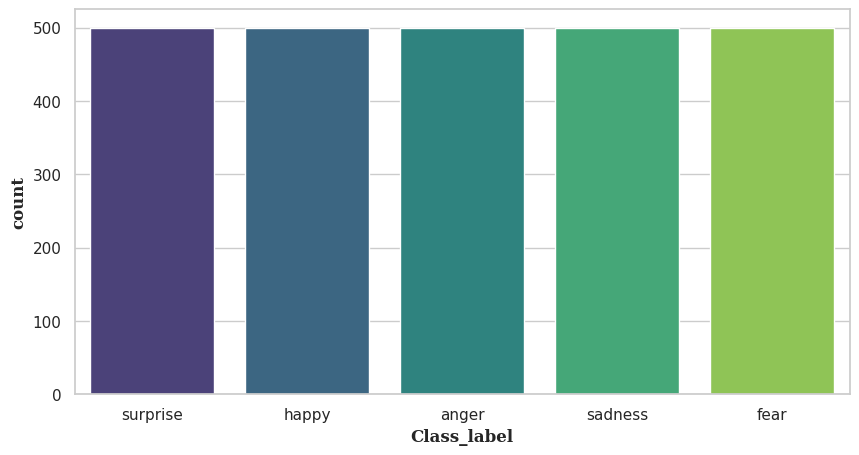

In [71]:
sns.set(style= 'whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Class_label', data = df_upsample, palette = 'viridis')
plt.ylabel('count',{'fontname' : 'serif', 'fontweight': 'bold'})
plt.xlabel("Class_label", {'fontname' : 'serif', 'fontweight' :'bold'})

In [72]:
data = df_upsample.sample(frac = 1)
data.head()

,Image_path,Class_label
443,CK+48/surprise/S034_001_00000027.png,surprise
108,CK+48/fear/S502_004_00000052.png,fear
824,CK+48/sadness/S095_010_00000014.png,sadness
203,CK+48/anger/S082_005_00000017.png,anger
188,CK+48/surprise/S092_001_00000017.png,surprise


## Resize Images

In [73]:
def resize_images(img):
  file = cv.imread(img)
  resized = cv.resize(file, (48,48), interpolation = cv.INTER_AREA)
  img_bgr = np.array(resized)
  return img_bgr


In [74]:
images = [resize_images(img) for img in data['Image_path']]

In [75]:
len(images)

2500

array([[[193, 193, 193],
        [179, 179, 179],
        [139, 139, 139],
        ...,
        [155, 155, 155],
        [175, 175, 175],
        [180, 180, 180]],

       [[168, 168, 168],
        [178, 178, 178],
        [114, 114, 114],
        ...,
        [ 83,  83,  83],
        [147, 147, 147],
        [185, 185, 185]],

       [[160, 160, 160],
        [145, 145, 145],
        [128, 128, 128],
        ...,
        [ 74,  74,  74],
        [119, 119, 119],
        [178, 178, 178]],

       ...,

       [[ 26,  26,  26],
        [ 31,  31,  31],
        [ 34,  34,  34],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 37,  37,  37]],

       [[ 25,  25,  25],
        [ 27,  27,  27],
        [ 32,  32,  32],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 50,  50,  50]],

       [[ 28,  28,  28],
        [ 31,  31,  31],
        [ 38,  38,  38],
        ...,
        [ 66,  66,  66],
        [ 67,  67,  67],
        [ 65,  65,  65]]], dtype=uint8)
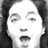

In [76]:
images[0]

In [77]:
# number of classes in dataset
num_classes = len(np.unique(data["Class_label"]))
num_classes

5

In [78]:
class_names = list(data["Class_label"])

In [79]:
images[10].shape

(48, 48, 3)

Text(0.5, 1.0, 'anger')

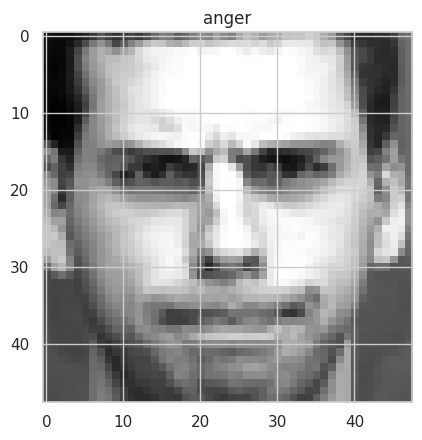

In [80]:
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'sadness')

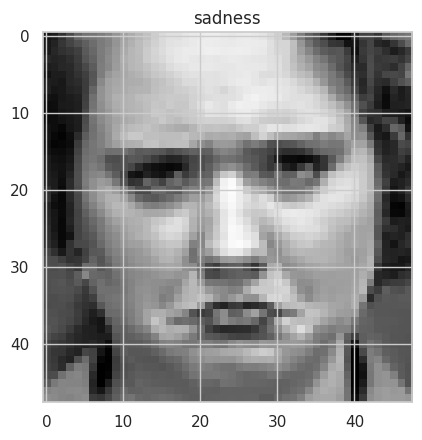

In [81]:
plt.imshow(images[20])
plt.title(class_names[20])

Text(0.5, 1.0, 'fear')

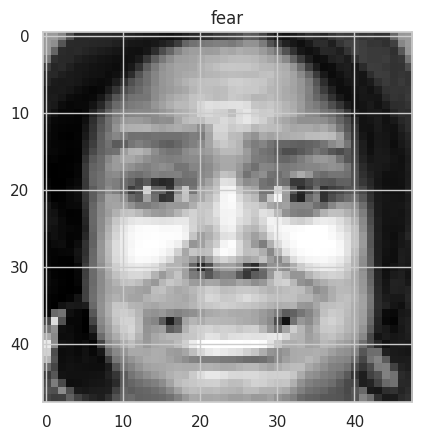

In [82]:
plt.imshow(images[100])
plt.title(class_names[100])

Text(0.5, 1.0, 'fear')

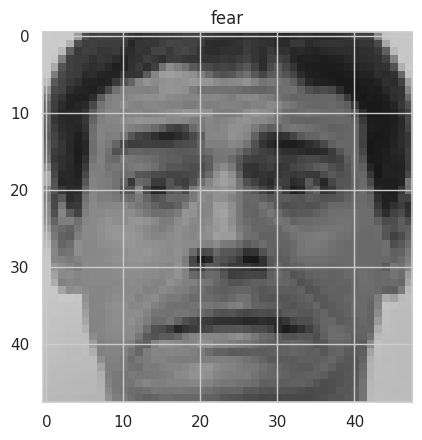

In [83]:
plt.imshow(images[320])
plt.title(class_names[320])

Text(0.5, 1.0, 'anger')

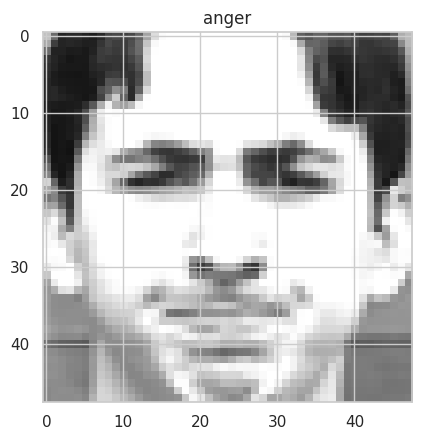

In [84]:
plt.imshow(images[140])
plt.title(class_names[140])

In [85]:
enc = LabelBinarizer()
y = enc.fit_transform(data['Class_label'])

In [86]:
y

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [87]:
data["Class_label"][:10]

,Class_label
443,surprise
108,fear
824,sadness
203,anger
188,surprise
890,anger
920,anger
911,sadness
226,happy
503,anger


In [88]:
images = np.array(images)
images.shape


(2500, 48, 48, 3)

array([[[193, 193, 193],
        [179, 179, 179],
        [139, 139, 139],
        ...,
        [155, 155, 155],
        [175, 175, 175],
        [180, 180, 180]],

       [[168, 168, 168],
        [178, 178, 178],
        [114, 114, 114],
        ...,
        [ 83,  83,  83],
        [147, 147, 147],
        [185, 185, 185]],

       [[160, 160, 160],
        [145, 145, 145],
        [128, 128, 128],
        ...,
        [ 74,  74,  74],
        [119, 119, 119],
        [178, 178, 178]],

       ...,

       [[ 26,  26,  26],
        [ 31,  31,  31],
        [ 34,  34,  34],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 37,  37,  37]],

       [[ 25,  25,  25],
        [ 27,  27,  27],
        [ 32,  32,  32],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 50,  50,  50]],

       [[ 28,  28,  28],
        [ 31,  31,  31],
        [ 38,  38,  38],
        ...,
        [ 66,  66,  66],
        [ 67,  67,  67],
        [ 65,  65,  65]]], dtype=uint8)
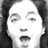

In [89]:
images[0]

In [90]:
y.shape

(2500, 5)

## Splitting Data into Training and Testing

In [91]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size = 0.3, stratify = y, random_state = 42)
print("Training Size: ", X_train.shape)
print("Testing Size: ", X_test.shape)

Training Size:  (1750, 48, 48, 3)
Testing Size:  (750, 48, 48, 3)


## CNN Model

In [92]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'same', activation = 'relu', input_shape = (48, 48, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding  = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding  = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.4))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 48, 48, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339,237 (1.29 MB)

 Trainable params: 339,237 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Compile Model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [111]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), batch_size =128)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9890 - loss: 0.0276 - val_accuracy: 0.9973 - val_loss: 0.0337
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9920 - val_loss: 0.0449
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9961 - loss: 0.0146 - val_accuracy: 0.9960 - val_loss: 0.0385
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9947 - val_loss: 0.0390
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9933 - val_loss: 0.0413
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9887 - loss: 0.0264 - val_accuracy: 0.9920 - val_loss: 0.0427
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9851 - loss: 0.0467 - val_accuracy: 0.9893 - val_loss: 0.0514
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9921 - loss: 0.0294 - val_accuracy: 0.9920 - v

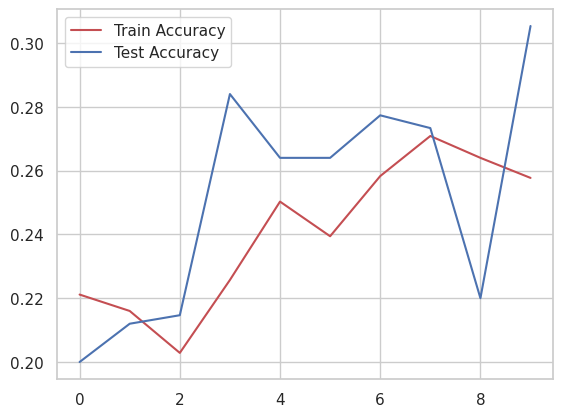

In [95]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})

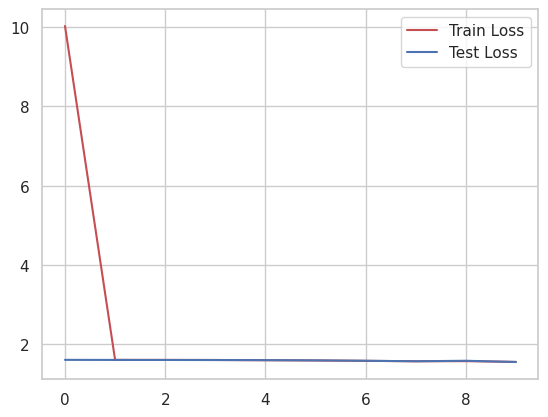

In [96]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [97]:
score1 = model.evaluate(X_test, y_test, verbose = 0)
print('Test Accuracy :',score1[1])

Test Accuracy : 0.30533334612846375


In [98]:
results = pd.DataFrame(columns=["Model",'Test Accuracy'])
new = ['CNN ',score1[1]]
results.loc[1] = new

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


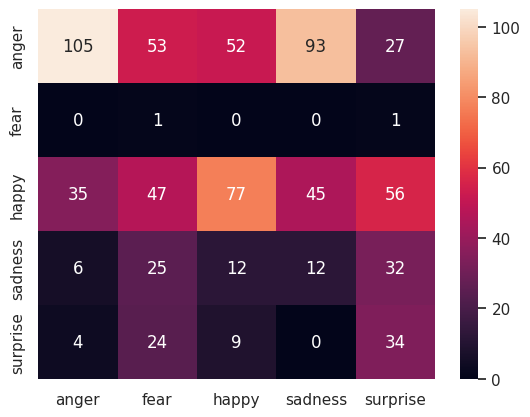

In [99]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(X_test), axis = 1), np.argmax(y_test, axis =1)), columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd')

In [100]:
df_heatmap

,anger,fear,happy,sadness,surprise
anger,105,53,52,93,27
fear,0,1,0,0,1
happy,35,47,77,45,56
sadness,6,25,12,12,32
surprise,4,24,9,0,34


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step



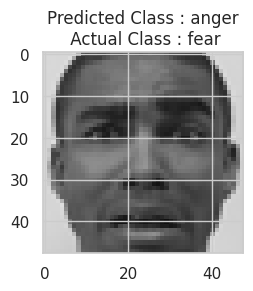

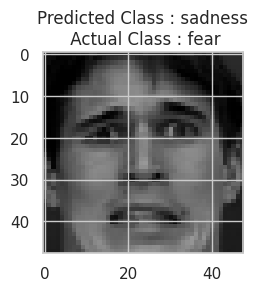

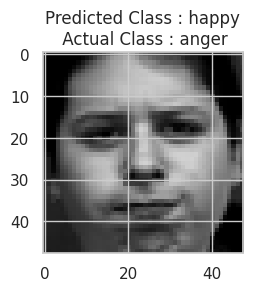

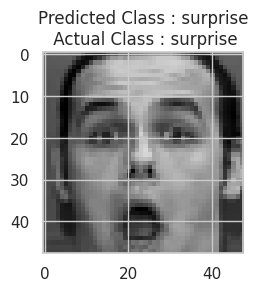

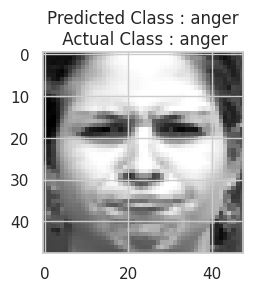

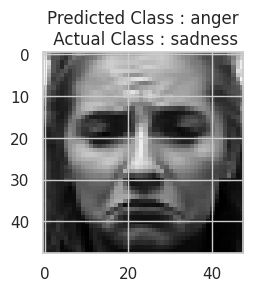

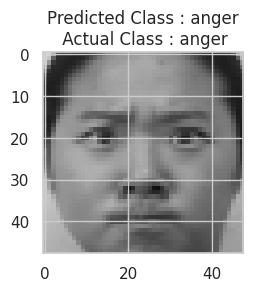

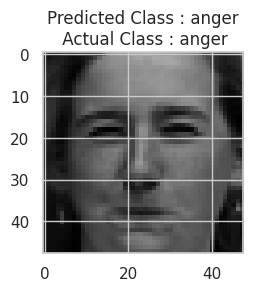

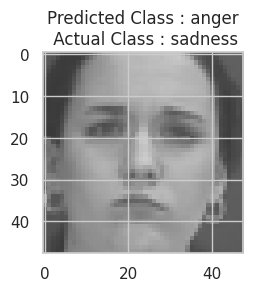

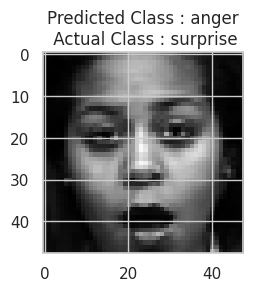

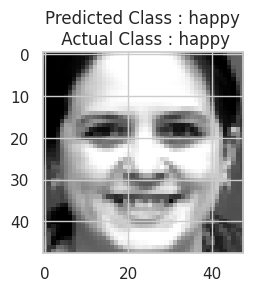

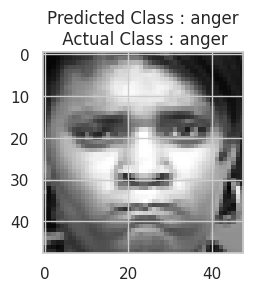

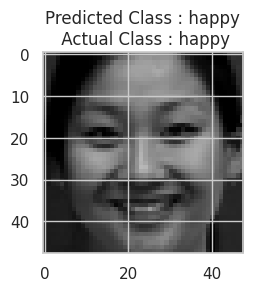

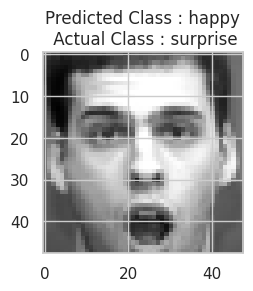

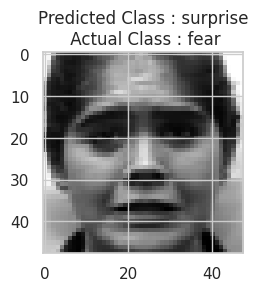

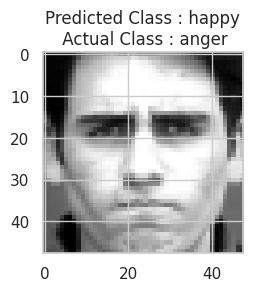

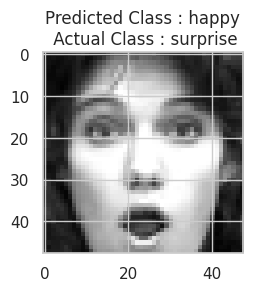

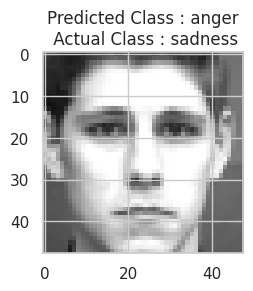

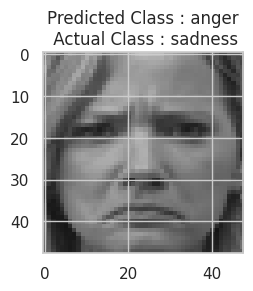

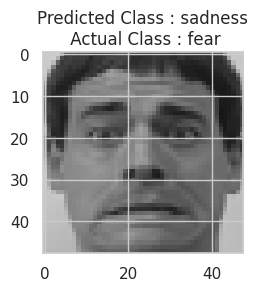

In [101]:
for i in range(20):
  plt.figure(figsize = (15,15))
  plt.subplot(4,5, i+1)
  pred = model.predict(np.array([X_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted Class : {}\n Actual Class : {}". format(enc.classes_[pred], enc.classes_[act]))
  print()
  plt.imshow(X_test[i])